# Финальный проект. Вариант 3

#### Задание: 
Представьте, что вы работаете в крупном дейтинговом приложении.

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки* при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

#### Проверьте:
Был ли эксперимент успешен в целом.

*Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.


#### Данные:
Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). 

Для каждой из них:

  
users_*.csv – информация о пользователях:

uid – идентификатор пользователя  
age – возраст  
attraction_coeff – коэффициент привлекательности (от 0 до 1000, лайки/просмотры∗1000)  
coins – число монеток (внутренняя валюта)  
country – страна    
visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)  
gender – пол  
age_filter_start  – фильтр поиска, мин. значение   
age_filter_end  – фильтр поиска, макс. значение   
views_count – число полученных оценок   
was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)  
is_premium –  является ли премиум  
total_revenue – нормированная выручка   

  
transactions_*.csv – информация о платежах пользователей:

uid – идентификатор пользователя  
country – страна  
joined_at – дата и время регистрации  
paid_at – дата и время покупки  
revenue – нормированная выручка  
payment_id – идентификатор платежа  
from_page – откуда пользователь перешел на страницу оплаты  
product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)   

#### Файлы:
users_test – информация о пользователях в тестовой группе.   
users_control_1 – информация о пользователях в первой контрольной группе.   
users_control_2 – информация о пользователях во второй контрольной группе.   
transactions_test – информация о платежах пользователей в тестовой группе.   
transactions_control_1 – информация о платежах пользователей в первой контрольной группе.   
transactions_control_2 – информация о платежах пользователей во второй контрольной группе.   

#### 1. Импортируем библиотеки и загрузим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import stats 
import seaborn as sns
import pingouin as pg

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
users_test=pd.read_csv('~/Finall_Project/Проект_3_users_test.csv', sep=';', encoding='cp1251') 
#информация о пользователях тестовой группы
users_control_1=pd.read_csv('~/Finall_Project/Проект_3_users_control_1.csv', sep=';', encoding='cp1251') 
#информация о пользователях контрольной группы №1
users_control_2=pd.read_csv('~/Finall_Project/Проект_3_users_control_2.csv', sep=';', encoding='cp1251') 
#информация о пользователях контрольной группы №2
transactions_test=pd.read_csv('~/Finall_Project/Проект_3_transactions_test.csv', sep=';', encoding='cp1251') 
#информация о платежах в тестовой группе
transactions_control_1=pd.read_csv('~/Finall_Project/Проект_3_transactions_control_1.csv', sep=';', encoding='cp1251') 
#информация о платежах в контрольной группе №1
transactions_control_2=pd.read_csv('~/Finall_Project/Проект_3_transactions_control_2.csv', sep=';', encoding='cp1251') 
#информация о платежах в контрольной группе №2

#### 2. Посмотрим данные и подготовим их к работе

Посмотрим на данные датафреймов о пользователях. Взглянем на данные пользователей из тестовой группы:

In [3]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


объем датафрейма users_test:

In [4]:
users_test.shape

(4308, 13)

Типы данных датафрейма users_test:

In [5]:
users_test.dtypes 

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

количество Nan в датафрейме users_test:

In [6]:
users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

кол-во уникальных пользователей в датафрейме users_test:

In [7]:
users_test['uid'].nunique()

4308

данные пользователей users_control_1:

In [8]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


объем датафрейма users_control_1:

In [9]:
users_control_1.shape

(4340, 13)

типы данных users_control_1:

In [10]:
users_control_1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

количество Nan в датафрейме users_control_1:

In [11]:
users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

кол-во уникальных пользователей в users_control_1

In [12]:
users_control_1['uid'].nunique()

4340

данные пользователей в датафрейме users_control_2

In [13]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


объем датафрейма users_control_2:

In [14]:
users_control_2.shape

(4264, 13)

типы данных в users_control_2:

In [15]:
users_control_2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

количество Nan в датафрейме users_control_2:

In [16]:
users_control_2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

кол-во уникальных пользователей в users_control_2:

In [17]:
users_control_2['uid'].nunique()

4264

Для дальнейшей работы объединим данные о пользователях в один датафрейм - users. Создадим отдельную колонку с информацией к какой группе относится каждый пользователь:

In [18]:
users_test['group']='test' 
users_control_1['group']='control_1'
users_control_2['group']='control_2'

In [19]:
users = pd.concat([users_test, users_control_1, users_control_2], axis=0)
users = users.reset_index(drop=True) 
users.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,test
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,test
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,test


Проверим совпадает ли кол-во пользователей объединенного датафрейма с количеством пользователей в исходных данных групп

In [20]:
users['uid'].nunique() == users_control_2['uid'].nunique()+users_control_1['uid'].nunique()+users_test['uid'].nunique() 

True

Сумма уникальных пользователей в группах совпадают с количеством уникальных пользователей в объединенном датафрейме, т.е. пользователи не дублируются в нескольких группах, все три выборки независимы друг от друга.

Для оценки частоты посещений создадим новую колонку retention, считающую кол-во посещений из visit_days:

In [21]:
users['visit_days']=users['visit_days'].str.split(',') #преобразовываем users['visit_days'] в серию
users['retention']=users['visit_days'].str.len().fillna(0).astype('int64') #создаем колонку retention с суммарным кол-вом посещений каждым пользователем
users.head(5)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
0,892309896,27,685,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]",1,24,30,89,NaN,NaN,0,test,14
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,test,0
2,892185708,45,44,NaN,Israel,"[1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1,42,48,68,NaN,NaN,0,test,20
3,892130292,32,0,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1,29,35,0,NaN,NaN,0,test,12
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0,test,0


Посмотрим данные о платежах в группах.  Общий вид данных в transactions_test:

In [22]:
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


объем датафрейма transactions_test:

In [23]:
transactions_test.shape

(273, 8)

типы данных в датафрейме transactions_test:

In [24]:
transactions_test.dtypes  

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

количество Nan в датафрейме transactions_test:

In [25]:
transactions_test.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

количество уникальных пользователей в transactions_test:

In [26]:
transactions_test['uid'].nunique()

146

данные в датафрейме transactions_control_1:

In [27]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


типы данных в датафрейме transactions_control_1:

In [28]:
transactions_control_1.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

объем датафрейма transactions_control_1:

In [29]:
transactions_control_1.shape

(1007, 8)

количество Nan в датафрейме transactions_control_1:

In [30]:
transactions_control_1.isna().sum()

uid             630
country         630
joined_at         0
paid_at           0
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

Удаляем 630 пустых строк в transactions_control_1, которые мы не можем использовать:

In [31]:
transactions_control_1=transactions_control_1.dropna(axis=0)

Проверяем объем датафрейма после удаления:

In [32]:
transactions_control_1.shape

(377, 8)

После удаления Nan, мы можем изменить тип колонок с float на int, чтобы данные были идентичны с transactions_test:

In [33]:
transactions_control_1[['uid','revenue','payment_id']]=transactions_control_1[['uid','revenue','payment_id']].astype('int64') 

количество уникальных пользователей в transactions_control_1

In [34]:
transactions_control_1['uid'].nunique()

193

Посмотрим данные transactions_control_2:

In [35]:
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


Объем данных в transactions_control_2:

In [36]:
transactions_control_2.shape 

(328, 8)

типы данных в датафрейме transactions_control_2:

In [37]:
transactions_control_2.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

количество Nan в датафрейме transactions_control_2:

In [38]:
transactions_control_2.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

После того как данные во всех трех таблицах унифицированы, объединим данные о платежах в один датафрейм - transactions. Перед этим создадим отдельную колонку с информацией к какой группе относится каждый платеж:

In [39]:
transactions_test['group']='test' 
transactions_control_1['group']='control_1'
transactions_control_2['group']='control_2' 

In [40]:
transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2], axis=0) 
transactions.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium,test
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium,test
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type,test
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type,test
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium,test


Проверим, правильно ли объединился датафрейм: кол-во строк в нем должно равняться сумме строк трех исходных датафреймов:

In [41]:
transactions.count()[0]==transactions_test.count()[0]+transactions_control_1.count()[0]+transactions_control_2.count()[0] 

True

Всё верно. Проверим нет ли задвоений по пользователям в разных таблицах о платежах:

In [42]:
transactions['uid'].nunique()==transactions_test['uid'].nunique()+transactions_control_1['uid'].nunique()+transactions_control_2['uid'].nunique()

True

Уникальные пользователи не повторяются в разных группах, как и в данных о пользователях.

Сравним на соответствие 2 объединенных датафрейма: users и transactions. Общие колонки у них: uid, country, revenue/total_revenue - сравним в чем разница между колонками revenue и total_revenue.
Если данные 2 колонок идентичны, то сумма выручки total_revenue из users должна равняться суммарной выручке revenue из transactions

In [43]:
users.total_revenue.sum()==transactions.revenue.sum()

False

Выручка из users не сходится с общей выручкой в transactions. Для нашего анализа эти данные являются ключевыми, поэтому посмотрим насколько велико расхождение и найдем в чем проблема:

In [44]:
transactions['revenue'].sum()-users['total_revenue'].sum() 

75127

Найдем транзакции и пользователей у которых получается это расхождение по выручке. Для этого из датафрейма по платежам создадим отдельный датафрейм общей выручки для каждого клиента и сравним с такой же выручкой в датафрейме пользователей.

In [45]:
users_revenue=transactions.groupby('uid', as_index=False).agg({'revenue':'sum'}) 
users_revenue.head()

,uid,revenue
0,891068079,10296
1,891071157,9100
2,891075072,2327
3,891077727,6292
4,891080040,15132


К таблице юзеров присоединяем данные о суммарной выручке каждого пользователя из таблицы с транзакциями, чтобы сравнить данные по выручке из 2х датафремов по каждому пользователю

In [46]:
users2=users.merge(users_revenue, how='inner', on='uid') 
users2.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention,revenue
0,891152790,29,769,NaN,Spain,"[2, 5, 6]",1,16,32,13,1.0,1.0,12597,test,3,12597
1,892333656,50,436,4.0,United States of America,"[1, 2, 3, 4]",1,47,53,126,NaN,NaN,897,test,4,897
2,891589239,21,303,37.0,Italy,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",1,18,24,181,1.0,1.0,37817,test,9,37817


Находим пользователей, у которых не сходятся данные по выручке из 2х таблиц:

In [47]:
users2.query('total_revenue!=revenue') 

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention,revenue
72,892275462,31,310,NaN,France,"[1, 2, 3, 4, 5, 9, 13, 15, 16]",1,36,68,58,1.0,1.0,14885,test,9,58968
162,960936960,30,4,99958.0,Russian Federation,"[1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, ...",1,26,62,4262,1.0,1.0,26,control_1,27,806
287,892355163,40,640,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,60,700,1.0,NaN,0,control_1,29,30264


проверим информацию по выручке каждого из этих пользователей из обоих таблиц: users и transactions

In [48]:
transactions.query('uid=="960936960"') 

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type,control_1
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type,control_1
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type,control_1


In [49]:
users.query('uid=="960936960"')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
4818,960936960,30,4,99958.0,Russian Federation,"[1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, ...",1,26,62,4262,1.0,1.0,26,control_1,27


In [50]:
transactions.query('uid=="892355163"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
303,892355163,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264,68,super_popup,other_type,control_1


In [51]:
users.query('uid=="892355163"')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
7678,892355163,40,640,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,60,700,1.0,NaN,0,control_1,29


In [52]:
transactions.query('uid=="892275462"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
64,892275462,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083,19,coins_popup,other_type,test
154,892275462,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885,68,super_popup,other_type,test


In [53]:
users.query('uid=="892275462"') 

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
2070,892275462,31,310,NaN,France,"[1, 2, 3, 4, 5, 9, 13, 15, 16]",1,36,68,58,1.0,1.0,14885,test,9


Делаем вывод что у этих клиентов не все платежи оказались включены в total_revenue в таблице пользователей. Это надо исправить. Найдем этих 3х пользователей в датафрейме пользователей:

In [54]:
users.query('uid=="960936960" or uid=="892275462" or uid=="892355163"') 

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
2070,892275462,31,310,NaN,France,"[1, 2, 3, 4, 5, 9, 13, 15, 16]",1,36,68,58,1.0,1.0,14885,test,9
4818,960936960,30,4,99958.0,Russian Federation,"[1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, ...",1,26,62,4262,1.0,1.0,26,control_1,27
7678,892355163,40,640,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,60,700,1.0,NaN,0,control_1,29


Вручную исправим данные о выручке в объединенном датафрейме пользователей:

In [55]:
users.iloc[2070,12]=58968 
users.iloc[4818,12]=806
users.iloc[7678,12]=30264

Проверим результат:

In [56]:
users['total_revenue'].sum()==transactions['revenue'].sum()

True

Данные о выручке 2х датафреймов сходятся. 

В объединенном датафрейме платежей переведём колонки с датами регистрации и даты покупки в формат даты:

In [57]:
transactions['joined_at']=transactions.joined_at.astype('datetime64')
transactions['paid_at']=transactions.paid_at.astype('datetime64') 

Проверим данные о платежах на ошибки: есть ли в данных платежи у которых дата регистрации пользователя позже даты оплаты.

In [58]:
transactions.query('joined_at>=paid_at')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
11,891861048,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588,68,none,premium_no_trial,test
20,891806280,United States of America,2017-10-27 08:56:00,2017-03-11 10:57:00,8242,147,trial_vip_popup,trial_premium,test
24,891786216,Spain,2017-10-27 18:20:00,2017-03-11 20:20:00,12818,147,trial_vip_popup,trial_premium,test
25,892057347,France,2017-10-21 23:15:00,2017-08-11 01:56:00,1209,19,none,coins,test
36,891589239,Italy,2017-10-31 14:16:00,2017-09-11 15:44:00,6305,19,empty_likes,coins,test
...,...,...,...,...,...,...,...,...,...
305,891606141,United States of America,2017-10-31 04:43:00,2017-03-11 21:13:00,3783,67,empty_likes,other_type,control_2
313,891691062,Belgium,2017-10-29 16:19:00,2017-05-11 18:35:00,16614,147,popular_users_block,trial_premium,control_2
314,892075512,United States of America,2017-10-21 16:58:00,2017-08-11 12:18:00,9958,147,trial_vip_popup,trial_premium,control_2
315,891722802,United States of America,2017-10-29 02:08:00,2017-05-11 05:49:00,12727,147,trial_vip_popup,trial_premium,control_2


Такие данные есть. Объединим их в отдельный датафрейм и посмотрим в чем ошибка:

In [59]:
wrong_date=transactions.query('joined_at>=paid_at')
wrong_date.shape 

(162, 9)

Всего 162 таких платежа. Посмотрим к каким временным промежуткам они относятся

In [60]:
wrong_date.agg({'joined_at':['min','max']})

,joined_at
min,2017-10-14 13:05:00
max,2017-10-31 22:17:00


In [61]:
wrong_date.agg({'paid_at':['min','max']}) 

,paid_at
min,2017-01-11 02:56:00
max,2017-10-11 21:26:00


Все платежи, с неправильной очередностью дат относятся к периоду между 11 января и 11 октября 2017 года, похоже все они были проведены 11-го числа какого-либо месяца. Все пользователи, с такими неправильными платежами были зарегистированы в промежутке между 14 и 31 октября 2017 года. Скорее всего эта ошибка вызвана с каким-то сбоем. Т.к. нет никакой информации что могло случиться, и как исправить данные, я думаю что данные об этих платежах можно удалить как недостоверные. 
Посмотрим как эти платежи распределены между тремя нашими группами. Если они распределены по группам неравномерно, их удаление может повлиять на результаты эксперимента. 

In [62]:
wrong_date.groupby('group', as_index=False).agg({'uid':'count'})

,group,uid
0,control_1,55
1,control_2,60
2,test,47


Платежи, у которых даты платежей стоят раньше дат регистрации клиентов распределены между группами равномерно. Их удаление не скажется сильно на результатах. Уберем эти данные с помощью query:

In [63]:
transactions=transactions.query('joined_at<=paid_at')

In [64]:
users.groupby('group').agg({'total_revenue':'sum'})

,total_revenue
group,
control_1,2612311
control_2,1920438
test,2344901


In [65]:
transactions.groupby('group').agg({'revenue':'sum'})

,revenue
group,
control_1,2291484
control_2,1493336
test,1943149


После удаления платежей внесем исправления в выручку в датафрейме с пользователями, чтобы везде была одинаковая информация. Для этого перезапишем датафрейм с суммарными платежами.

In [66]:
users_revenue_2=transactions.groupby('uid', as_index=False).agg({'revenue':'sum'}) 
users_revenue_2

,uid,revenue
0,891068079,10296
1,891071157,9100
2,891075072,2327
3,891077727,6292
4,891080040,15132
...,...,...
446,892434141,9165
447,892435536,13598
448,892438635,16653
449,892438776,12727


Перенесем эти данные в датафрейм users:

In [67]:
users=users.merge(users_revenue_2, how='outer', on='uid') 
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention,revenue
0,892309896,27,685,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17]",1,24,30,89,NaN,NaN,0,test,14,NaN
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,test,0,NaN
2,892185708,45,44,NaN,Israel,"[1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1,42,48,68,NaN,NaN,0,test,20,NaN
3,892130292,32,0,NaN,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",1,29,35,0,NaN,NaN,0,test,12,NaN
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0,test,0,NaN


Заменим NaN на нули, поменяем тип данных колонки на int64:

In [68]:
users['revenue']=users['revenue'].fillna(0).astype('int64') 

In [69]:
users['revenue']=users['revenue'].astype('int64') 

Проверим сходится ли суммарная выручка в двух датафреймах:

In [70]:
users['revenue'].sum()==transactions['revenue'].sum()

True

Передаем данные из колонки revenue в основную колонку. Удаляем колонку revenue

In [71]:
users['total_revenue']=users['revenue']
users=users.drop('revenue', axis=1)

Проверим еще раз проверим сходится ли суммарная выручка в двух датафреймах:

In [72]:
users['total_revenue'].sum()==transactions['revenue'].sum()

True

Еще одна проверка на правильность дат. По условию изменения стоимости подписки рассчитаны на новых пользователей, то есть в эксперимент должны были попасть только они. Кто такие старфые и новые пользователи не поясняется. Предположим что новыми являются те пользователи, которые зарегистрировались после начала эксперимента 

In [73]:
transactions.agg({'paid_at':['min','max']})

,paid_at
min,2016-12-14 16:16:00
max,2017-12-11 23:28:00


Судя по крайним датам платежей эксперимент длился почти год: с 14 декабря 2016 по 11 декабря 2017. Будем считать началом эксперимента 2016-12-14, а всех кто зарегистрировался до этого дня - старыми клиентами. Посмотрим ли пользователи, зарегистрированные до этой даты:

In [74]:
transactions.query('joined_at<"2016-12-14"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
65,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26,0,refund_VP,other_type,control_1
101,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637,0,refung_AP,other_type,control_1
224,960936960,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143,0,refund_WP,other_type,control_1


Есть 1 такой пользователь, его платежи как раз от 2016-12-14, которое мы приняли за начало эксперимента. Удалим его данные из всех созданных датафреймов:

In [75]:
users = users.loc[users['uid'] != 960936960]

In [76]:
users2 = users2.loc[users2['uid'] != 960936960]

In [77]:
transactions = transactions.loc[transactions['uid'] != 960936960]

Еща раз взглянем на крайние даты платежей и регистраций:

In [78]:
transactions.agg({'paid_at':['min','max']})

,paid_at
min,2017-01-11 05:16:00
max,2017-12-11 23:28:00


In [79]:
transactions.agg({'joined_at':['min','max']})

,joined_at
min,2017-01-11 01:06:00
max,2017-10-31 23:40:00


Для проверки посмотрим на 5 самые ранние и поздние даты регистрации и платежей:

In [80]:
transactions.sort_values('joined_at', ascending=True)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
196,891561825,France,2017-01-11 01:06:00,2017-08-11 03:06:00,12636,147,trial_vip_popup,trial_premium,control_1
342,891561825,France,2017-01-11 01:06:00,2017-01-11 13:33:00,3913,146,empty_likes,coins,control_1
368,891561825,France,2017-01-11 01:06:00,2017-04-11 23:21:00,3900,19,empty_likes,coins,control_1
6,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100,147,left_sidebar_menu,premium_no_trial,test
43,891558921,United States of America,2017-01-11 03:07:00,2017-10-11 09:08:00,897,146,menu,coins,test
...,...,...,...,...,...,...,...,...,...
121,891605694,Argentina,2017-10-31 05:09:00,2017-11-15 04:33:00,12597,147,popular_users_block,premium_no_trial,test
131,891603810,United States of America,2017-10-31 06:36:00,2017-10-31 06:52:00,4602,146,menu,coins,test
191,891589239,Italy,2017-10-31 14:16:00,2017-10-31 16:07:00,12597,147,popular_users_chat,premium_no_trial,test
210,891589239,Italy,2017-10-31 14:16:00,2017-10-31 14:21:00,6305,19,empty_likes,coins,test


In [81]:
transactions.sort_values('paid_at', ascending=True)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
372,891556971,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886,68,none,premium_no_trial,control_1
342,891561825,France,2017-01-11 01:06:00,2017-01-11 13:33:00,3913,146,empty_likes,coins,control_1
362,891543996,United States of America,2017-01-11 13:42:00,2017-01-11 14:41:00,6292,147,user_profile,premium_no_trial,control_1
215,891503397,Italy,2017-02-11 12:22:00,2017-02-11 12:26:00,6448,147,autoreply_message,premium_no_trial,control_1
46,891545874,United States of America,2017-01-11 12:50:00,2017-02-11 13:43:00,12597,147,send_message,premium_no_trial,test
...,...,...,...,...,...,...,...,...,...
170,891765819,Italy,2017-10-28 04:24:00,2017-12-11 21:23:00,2327,67,empty_likes,other_type,control_1
129,891765819,Italy,2017-10-28 04:24:00,2017-12-11 21:24:00,7852,146,empty_likes,coins,control_1
0,891319275,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727,147,trial_vip_popup,trial_premium,control_1
115,891312873,Italy,2017-05-11 21:22:00,2017-12-11 22:06:00,3926,146,empty_likes,coins,test


Теперь по нашим данным, платежи начались 11 января 2017, в этот же день случилась первая регистрация пользователя, последняя регистрация состоялась 31 октября того же года, а последний платеж прошел - 11 декабря. Итого: в наших данных транзакции ровно за 11 месяцев 2017 года с 11 января по 11 декабря - это время эксперимента. Все пользователи были зарегистрированы на платформе в течении этого времени, т.е. являются новыми. 

По условию задачи, размер премиум-подписки был изменен для новых пользователей из нескольких стран. Значит в данных могут быть страны, для пользователей которых никакие изменения не наступили, значит они должны отсуствовать в тестовой группе. Значит нужно оставить в эксперименте нужно только те страны, которые присустсвуют в тестовой группе.  Выберем такие страны:

In [103]:
needful_country=users.pivot_table (index='country', columns='group', values='uid', aggfunc='count').reset_index()
needful_country=needful_country.query('test!="NaN"')
needful_country.head()

group,country,control_1,control_2,test
0,Algeria,2.0,NaN,2.0
1,Argentina,389.0,397.0,396.0
2,Australia,50.0,51.0,62.0
3,Azerbaijan,NaN,NaN,1.0
4,Belgium,108.0,90.0,92.0


In [83]:
needful_country['country'].count()

51

Таких стран 51 из 72х

In [84]:
users['uid'].count()

12911

Оставим в датафрейме пользователей только из этих 51 страны. Посмотрим текущее количество пользователей:

С помощью merge оставим только пользователей из датафрейма needful_country

In [131]:
users=users.merge(needful_country, how='right', on='country')

Проверим количество стран, оставшихся в данных после объединения:

In [132]:
users['country'].nunique()

51

Всё верно. Проверим количество пользователей после объединения:

In [133]:
users['uid'].count()

12886

Количество пользователей уменьшилось с 12911 до 12886 (на 25 человек из 21 страны)

In [92]:
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
0,891235122,27,0,NaN,Algeria,"[1, 3, 4, 7, 9]",1,24,30,1,NaN,NaN,0,test,5
1,892161111,30,891,NaN,Algeria,"[1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 18, 19, ...",1,21,55,37,NaN,NaN,0,test,17
2,892223124,49,858,NaN,Algeria,"[1, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18]",1,16,99,319,NaN,NaN,0,control_1,14
3,892068705,40,190,NaN,Algeria,"[1, 2, 3, 4, 5]",1,16,65,21,NaN,NaN,0,control_1,5
4,891092496,27,0,NaN,Argentina,"[1, 2, 4]",1,19,32,0,NaN,NaN,0,test,3


Удалим ненужые колонки, которые остались после merge

In [93]:
users=users.drop(columns=['control_1', 'control_2', 'test'], axis=1)

KeyError: "['control_1' 'control_2' 'test'] not found in axis"

In [94]:
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention
0,891235122,27,0,NaN,Algeria,"[1, 3, 4, 7, 9]",1,24,30,1,NaN,NaN,0,test,5
1,892161111,30,891,NaN,Algeria,"[1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 18, 19, ...",1,21,55,37,NaN,NaN,0,test,17
2,892223124,49,858,NaN,Algeria,"[1, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18]",1,16,99,319,NaN,NaN,0,control_1,14
3,892068705,40,190,NaN,Algeria,"[1, 2, 3, 4, 5]",1,16,65,21,NaN,NaN,0,control_1,5
4,891092496,27,0,NaN,Argentina,"[1, 2, 4]",1,19,32,0,NaN,NaN,0,test,3


Теперь когда все данные проверены и исправлены создадим новый датафрейм, в котором объединим данные обо всех пользователях и данные об их платежах в разрезе по типу продукта, чтобы иметь возможность анализировать данные о премиум подписке.  

На основе датарфейма о транзакциях сделаем новый датафрейм стоимости транзакций по типам покупок и по пользователям:

In [95]:
users_transactions=transactions.pivot_table (index='uid', columns='product_type', values='revenue', aggfunc='sum').reset_index()
users_transactions=users_transactions.fillna(0)
users_transactions[['coins','other_type','premium_no_trial','trial_premium']]=users_transactions[['coins','other_type','premium_no_trial','trial_premium']].astype('int64')
users_transactions.head()

product_type,uid,coins,other_type,premium_no_trial,trial_premium
0,891068079,4004,0,6292,0
1,891071157,0,0,9100,0
2,891075072,0,2327,0,0
3,891077727,0,0,6292,0
4,891080040,7566,7566,0,0


Объединим его с основным датафремом пользователей, чтобы видеть какие типы покупки и на какие суммы совершал каждый пользователь:

In [96]:
users3=users.merge(users_transactions, how='outer', on='uid')
users3[['coins_y', 'other_type', 'trial_premium', 'premium_no_trial']]=users3[['coins_y', 'other_type', 'trial_premium', 'premium_no_trial']].fillna(0)
users3.head()

,uid,age,attraction_coeff,coins_x,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,retention,coins_y,other_type,premium_no_trial,trial_premium
0,891235122,27,0,NaN,Algeria,"[1, 3, 4, 7, 9]",1,24,30,1,NaN,NaN,0,test,5,0.0,0.0,0.0,0.0
1,892161111,30,891,NaN,Algeria,"[1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 18, 19, ...",1,21,55,37,NaN,NaN,0,test,17,0.0,0.0,0.0,0.0
2,892223124,49,858,NaN,Algeria,"[1, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18]",1,16,99,319,NaN,NaN,0,control_1,14,0.0,0.0,0.0,0.0
3,892068705,40,190,NaN,Algeria,"[1, 2, 3, 4, 5]",1,16,65,21,NaN,NaN,0,control_1,5,0.0,0.0,0.0,0.0
4,891092496,27,0,NaN,Argentina,"[1, 2, 4]",1,19,32,0,NaN,NaN,0,test,3,0.0,0.0,0.0,0.0


Сравним количество пользователей в новом датафрейме с исходным

In [105]:
users3['uid'].count()==users['uid'].count()

True

#### Промежуточный результат:
В ходе обработки данных были в датафреймах были удалены пустые строки, исправлены расхождения по выручке в датафреймах. Создана колонка частоты  посещаемости. Были удалены данные о 162 платежах, у которых платеж произошел раньше регистрации пользователя, удален 1 пользователь, зарегистрированый до начала эксперимента (проходил с 11.01 по 11.12 2017 года). Кроме того из датафрейма пользователей были удалены 18 пользователей из стран, которые не попали в контрольные группы (и 1 пользователь из датафрейма трназакций).  
Созданы датафреймы:   
users - c данными о пользователях из всех 3 групп    
users2 - c данными о пользователях + их суммарные платежи  
users3 - c данными о пользователях + их платежи за каждый тип продукта  
transactions - c данными о платежах из всех 3 групп   
Во всех группах присутствуют только новые пользователи, зарегистрированные во время эксперимента. Отобраны платежи, с датами позже даты регистрации пользователя. Во всех трех группах свои уникальные пользователи, все группы - это несвязанные выборки.

#### Проверим однородность групп

Так как у нас есть множество данных о пользователях мы можем сравнить 3 группы эксперимента, не только по количеству, но и по ряду качественных характеристик пользователей, с тем чтобы убедиться что группы однородны по составу, и средний портрет пользователя в каждой из групп один и тот же. Мы можем сравнить характеристики, которые не менялись в ходе эксперимента: количество пользователей, возраст, пол, страна. 

Посмотрим общий размер трех групп по числу пользователей:

In [106]:
users3.groupby('group', as_index=False).agg({'uid':'count'})

,group,uid
0,control_1,4329
1,control_2,4249
2,test,4308


Размеры практически идентичные, отличаются между собой на 1%

Сравним соотношение полов в группах:

In [107]:
users3.pivot_table (index='group', columns='gender', values='uid', aggfunc='count').reset_index()

gender,group,0,1
0,control_1,182,4147
1,control_2,194,4055
2,test,202,4106


Соотношение полов в каждой группе примерно одинаковое

Сравним средний возраст в каждой группе и разброс пользователей по возрасту в разрезе групп:

In [108]:
users.groupby('group', as_index=False).agg({'age':'mean'}).round(2)

,group,age
0,control_1,32.09
1,control_2,32.03
2,test,31.89


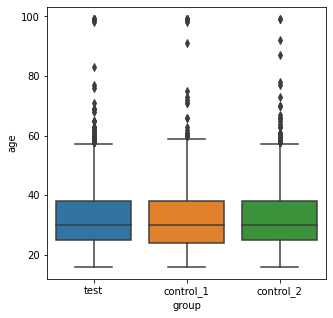

In [109]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=users, x='group', y='age') 

Показатели возраста во всех группах идентичные. 
Мы можем сделать вывод о том что все группы, отобранные для экспримента однородны по возрасту, полу и количеству участников. И мы можем сравнивать их реакцию на изменение стоимости премиум-подписки при равенстве ихисходныхх характеристик.

#### 3. Изучим данные и выберем метрики, по которым будем оценивать влияние эксперимента

Посмотрим размеры групп:

In [111]:
users.groupby('group', as_index=False).agg({'uid':'count'})

,group,uid
0,control_1,4329
1,control_2,4249
2,test,4308


посмотрим как различается выручка в группах эксперимента в разрезе по типам покупок.

In [112]:
transactions.pivot_table (index='group', columns='product_type', values='revenue', aggfunc='sum').reset_index()

product_type,group,coins,other_type,premium_no_trial,trial_premium
0,control_1,800722,173537,717353,599066
1,control_2,300794,105066,682487,404989
2,test,490711,120380,726830,605228


Из данных видно что максимальную выручку по премиум-подписке и пробной-премиум с небольшим отрывом собрала тестовая группа, а максимальную выручку по двум другим продуктам - контрольная группа №1.

Количество покупок и выручка по видам покупок:

In [113]:
product_type=transactions.groupby('product_type', as_index=False).agg({'revenue':['count','sum']})
product_type.columns=['product_type','sales','revenue']
product_type.sort_values('revenue',ascending=False)

,product_type,sales,revenue
2,premium_no_trial,256,2126670
3,trial_premium,131,1609283
0,coins,316,1592227
1,other_type,110,398983


Самая популярная вид покупки - coins, самый прибыльный - премиум-подписка

Вынесем транзакции по премиум-подписке в отдельный датафрейм:

In [114]:
premium_transactions=transactions.query('product_type=="premium_no_trial"') 

Задаем сравнительную таблицу объема выручки, кол-ва покупок и ср.чека в разрезе групп для премиум-подписки

In [115]:
premium_revenue=transactions.query('product_type=="premium_no_trial"').groupby('group',as_index=False).agg({'revenue':['sum','count']})
premium_revenue.columns = ['group', 'total_revenue', 'sales']
premium_revenue['check']=(premium_revenue.total_revenue/premium_revenue.sales).round(2)
premium_revenue.sort_values('check',ascending=False) 

,group,total_revenue,sales,check
2,test,726830,65,11182.00
0,control_1,717353,95,7551.08
1,control_2,682487,96,7109.24


Видим что в контрольных группах при большем количестве покупок, более низкий средний чек чем в тестовой группе. За счет этого тестовая группа показала в сумме более высокую выручку.

Посмотрим распределение и выбросы по выручке в премиум подписке по группам:

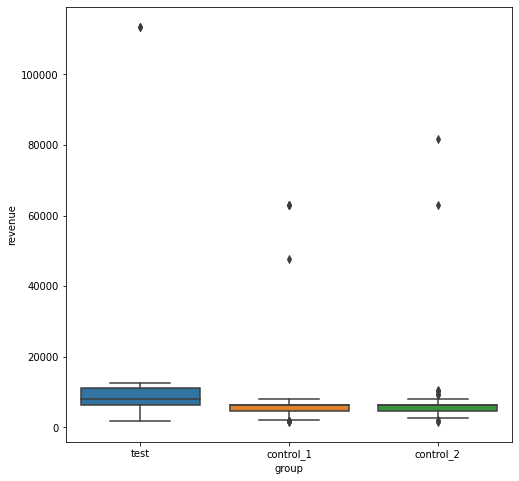

In [116]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=premium_transactions, x='group', y='revenue')

Показатели тестовой группы кажется выше, за исключением минимальных значений, которые во всех гурппах примерно равны. Показатели контрольных групп примерно равны между собой.

Распределение выручки среди оплативших премимум-подписку:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


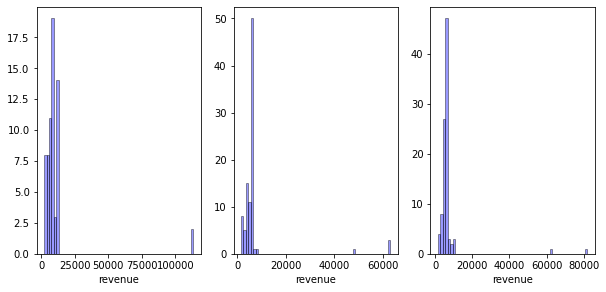

In [117]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
sns.distplot(premium_transactions.query('group =="test"')['revenue'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.subplot(2, 3, 2)
sns.distplot(premium_transactions.query('group =="control_1"')['revenue'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.subplot(2, 3, 3)
sns.distplot(premium_transactions.query('group =="control_2"')['revenue'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})

#### Промежуточные результаты:
Все три группы примерно равны по объему, и имеют большую выборку. По абсолютным показателям выручки за премиум-пописку нельзя однозначно выделить самую успешную группу. При этом количество покупок подписки выше в контрольных группах, но средний чек за покупку выше в тестовой группе. Во всех группах есть некоторые выбросы по покупкам. Распределение внутри групп по премиум подписке неправильное. 

#### Выбор метрик для исследования.
Так как, эксперимент касается изменения стоимости продукта мы должны измерить экономические метрики, показывающих финансовое значение изменение стоимости продукта:

Конверсию в премиум-подписку (CR) - отношение количества оплативших клиентов к общему числу клиентов в группе.

ARPU - средний доход с пользователя

ARPPU - средний доход с клиента, купившего премиум-подписку

Для иных экономических метрик у нас нет данных о маркетинговых расходах. Т.к. у нас только данные о новых пользователях, то нам не с чем сравнить их приток. На метрики удержания новых клиентов могут влиять разные факторы помимо стоимости подписки. 

#### 3. Расчет метрик:

Расчитаем CR и ARPPU для групп и разницу в процентах контрольных групп от показателей тестовой группы:

In [118]:
metrics = pd.DataFrame(users3.query('premium_no_trial!="0.0"').groupby('group').agg({'uid':'count'}))/(users3.groupby('group').agg({'uid':'count'}))
metrics=metrics.rename(columns={'uid':'CR'}).round(4)
metrics['ARPPU']=users3.query('premium_no_trial!="0.0"').groupby('group').agg({'premium_no_trial':'mean'}).round(4)
metrics['CR,%']=((metrics['CR']-metrics.loc['test', 'CR'])/metrics.loc['test', 'CR']*100).round(2)
metrics['ARPPU,%']=((metrics['ARPPU']-metrics.loc['test', 'ARPPU'])/metrics.loc['test', 'ARPPU']*100).round(2)
metrics

,CR,ARPPU,"CR,%","ARPPU,%"
group,,,,
control_1,0.0206,8060.1461,48.20,-33.46
control_2,0.0217,7418.3370,56.12,-38.76
test,0.0139,12113.8333,0.00,0.00


Расчитаем ARPU для групп через объединение 2х датафреймов и разницу в процентах между метриками контрольных групп и тестовой

In [119]:
users_count=users3.groupby('group', as_index=False).agg({'uid':'count'})

In [120]:
revenue_premium=premium_transactions.groupby('group').agg({'revenue':'sum'})

In [121]:
ARPU=users_count.merge(revenue_premium, how='inner', on='group')
ARPU['ARPU']=ARPU['revenue']/ARPU['uid'].round(4)
ARPU=ARPU.set_index('group')
ARPU['ARPU,%']=(ARPU['ARPU']-ARPU.loc['test', 'ARPU'])/ARPU.loc['test', 'ARPU']*100
ARPU

,uid,revenue,ARPU,"ARPU,%"
group,,,,
control_1,4329,717353,165.708709,-1.782657
control_2,4249,682487,160.622970,-4.797029
test,4308,726830,168.716342,0.000000


Для контрольных групп наблюдаем рост конверсии на 48,2% и 56,1%, и снижение ARPPU (-33,5%; -38,8%) и ARPU (-1,7%; -4,8%). То есть в контрольных группах конверсия выросла, а метрики прибыли снизилась.   
#### Являются ли эти различия статистически значимыми?

#### 4. Оценим влияние эксперимента на различие в выручке между группами

Нам нужно сравить 3 несвязанные выборки с параметрическими данными. Минимальное число наблюдений в группе - 65. Для проверки стат. значимости полученных значений по 3м метрикам мы применим однофакторный дисперсионный анализ.

### CR - конверсия в покупателя
Сформулируем нулевую и альтернативную гипотезы:

H0: CR в группах одинаковые.  
H1: CR в группах различаются.

Для проверки конверсии в премиум пописку на стат.значимость нам надо проставить у всех пользователей ранги: 1 - куплена подписка, 0 - не куплена подписка

In [122]:
users3['CR']=np.where(users3['premium_no_trial']>0, '1', '0')
users3['CR']=users3['CR'].astype('int64')

К дисперсионному анализу anova выдвигаются требования:  
    1) независимые выборки  (подтверждено - во всех группах разные пользователи)  
    2) дисперсии внутри группы должны быть одинаковы (гомогенность дисперсий)   
    
    
Проверим данные на гомогенность дисперсий:   
H0 - дипсерсии внутри групп однородны  
H1 - дисперсии внутри групп неоднородны

In [123]:
pg.homoscedasticity(data=users3, dv="CR", group="group") 

,W,pval,equal_var
levene,4.091259,0.01674,False


p-value < 0.05 - отклоняем нулевую гипотезу об однородности дисперсий

Неоднородность дисперсий не отвечает требованиям для проведения ANOVA, поэтому обратимся к тесту ANOVA - Уэлча, который предусмотрен для таких случаев:

In [124]:
pg.welch_anova(data=users3, dv="CR", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,8492.094596,4.641323,0.009669,0.000635


P-value < 0.05 значит мы отклоняем предположение о равенстве конверсий в группах

Вывод: p-value меньше 0.05 - отклоняем нулевую гипотезу, что конверсии во всех группах равны. Проведем тест Джеймса-Хоуэлла, чтобы узнать между какими именно группами есть стат.значимые различия конверсии

In [125]:
pg.pairwise_gameshowell(data=users3, dv="CR", between="group")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,control_1,control_2,0.020559,0.021652,-0.001093,0.003105,-0.352088,8559.437049,0.900000,-0.007603
1,control_1,test,0.020559,0.013928,0.006631,0.002800,2.368185,8351.448611,0.047039,0.050960
2,control_2,test,0.021652,0.013928,0.007725,0.002859,2.701606,8136.365609,0.018958,0.058407


Из значений p-value видно что средние контрольных групп идентичны друг другу (p-value=0.9), а конверсия тестовой группы стат.значимо отличается от каждой из них (p-value < 0.05). Делаем вывод что конверсия в покупателей в тестовой группе стат.значимо ниже.

### ARPU - средний доход с пользователя
Сформулируем нулевую и альтернативную гипотезы:

H0: ARPPU в группах одинаковые.  
H1: ARPPU в группах различаются.

Проверим данные на гомогенность дисперсий:  
H0 - дипсерсии внутри групп однородны  
H1 - дисперсии внутри групп неоднородны  

In [126]:
pg.homoscedasticity(data=users3, dv="premium_no_trial", group="group") 

,W,pval,equal_var
levene,0.014833,0.985276,True


p-value > 0.05 - принимаем нулевую гипотезу об однородности дисперсий. Можем провести тест на дисперсионный анализ

In [127]:
pg.anova (data=users3, dv="premium_no_trial", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,12883,0.014833,0.985276,0.000002


Вывод: p-value > 0.05 и стремится к 1. F<1. Мы принимаем нулевую гипотезу о том что ARPU во всех группах равны. 

### ARPPU - средний доход с клиента, купившего премиум-подписку
Сформулируем нулевую и альтернативную гипотезы:

H0: ARPPU в группах одинаковые.  
H1: ARPPU в группах различаются.  

Вынесем данные о пользователях, купивших премимум-подписку в отдельный датафрейм:

In [128]:
premium_users=users3.query('premium_no_trial!="0.0"')

Проверим данные на гомогенность дисперсий:  
H0 - дипсерсии внутри групп однородны  
H1 - дисперсии внутри групп неоднородны  

In [129]:
pg.homoscedasticity(data=premium_users, dv="premium_no_trial", group="group") 

,W,pval,equal_var
levene,1.580692,0.207986,True


p-value > 0.05 - принимаем нулевую гипотезу об однородности дисперсий. Можем провести тест на дисперсионный анализ

In [130]:
pg.anova (data=premium_users, dv="premium_no_trial", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,238,2.453793,0.088139,0.020204


Вывод: p-value > 0.05. F>1. Мы отклоняем нулевую гипотезу о том что ARPPU во всех группах равны. 

### Вывод:
По сравнению с тестовой группой в контрольных группах стат.значимо выросла конверсия (СR). ARPPU в контрольных группах, наоборот, снизилась, а ARPU - не изменилась. То есть эксперимент показал что изменение стоимости премиум-подписки привело к увеличению конверсии, но средний чек покупателей стал ниже. В результате при перерасчете на всех пользователей средний чек остался таким же как и в тестовой группе. Я бы НЕ рекомендовал применять результаты эксперимента на всех пользователей из-за неоднозначности результатов  эксперимента.